## Project 1 - Simulated Data Set Analysis 

***

Author: Emma Dunleavy 

Student Number: g00425660

Module: Programming for Data Analysis Winter 2023/24  

Lecturer: Brian McGinley
***

### Required Libraries
***

In [103]:
import pandas as pd # Data frames
import numpy as np # Numerical arrays
import seaborn as sns # Data visualization
import matplotlib.pyplot as plt # Data visualization
import scipy.stats as ss # Probabilistic distributions and statistical operations
from scipy.stats import f_oneway # One-way ANOVA
import statistics as s # for alternative method for generating data
import random

<span style='color:orange'> Question Part 1 - Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables. </span>

Using the results derived from the Mashad stroke and heart atherosclerotic disorders (MASHAD) study (2010-2020) [1], I have selected variables as per tables 1 below for analysis, with a focus on systolic blood pressure, for people categorised as "Normal weight", "Underweight" and "Obese". For the discussion in this report the "Normal Weight" variable will be reported as "Healthy weight".  The other contributing measured variables are "Age", "Weight", "Height" and "Total energy expenditure". Table 1 provides a summary of the study's statistical findings, which is a sample of the overall results, follow the link below for a comprehensive listing of the study findings.

[Dietary Intake and Its Relationship to Different Body Mass Index Categories: A Population-Based Study ](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6941633/)

|Variable| 	Healthy weight| 	Underweight |	 Obese|
|:-----|-----|:-----:|-----:|
||**Mean / 	SD**| **Mean 	/ SD** |**Mean	/  SD**|	
|<span style='color:grey'>**Age (yr)**</span> |	47.9 / 8.5|	47.6	/ 8.1|		48.4	/ 7.9	|
|<span style='color:grey'>**Weight(kg)**</span> |	47.9 /	6.5|	48.2 /	8.6|		81.6 /	14.8|
|<span style='color: grey'>**Height (meter)**</span> |	1.6	/0.1	|1.6	/0.1		|1.5 /0.1	|
|<span style='color:grey'>**Total energy expenditure**</span> |	2362.0	/ 341.2	|2380.6	 / 384.6	|  2344.0 /	269.9|
|<span style='color:grey'>**Systolic blood pressure (mmHg)**</span> | 	116.3 /	19.1 |	111.3	/ 20.0	| 	122.6	/ 26.2 |

**<i>Table 1 - Statistical findings of continuous data<i>**

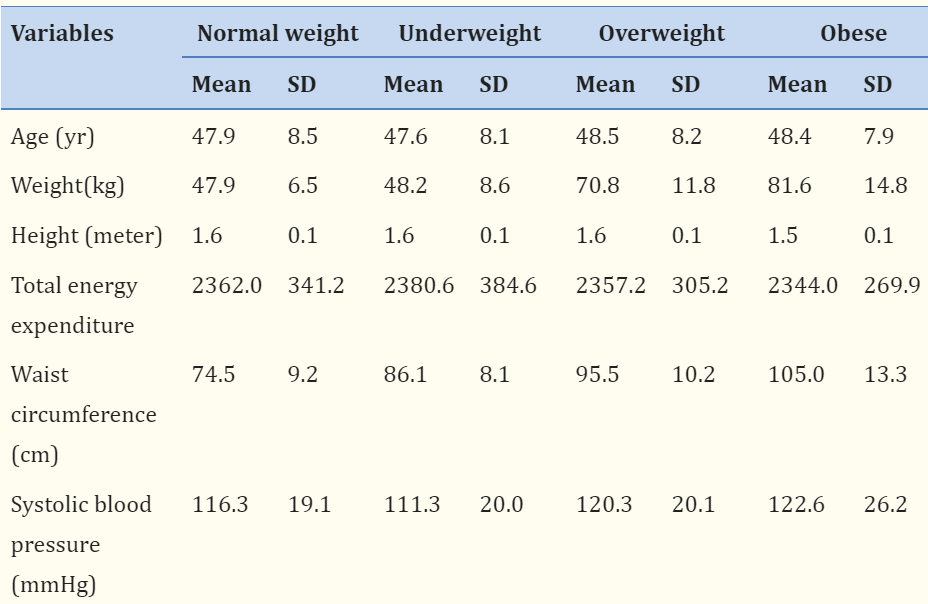

 **<i>Figure 1 - Study Results<i>**
 (Note figure contains additional variables excluded from this report.)

<span style='color:orange'>Part 2: Investigate the types of variables involved, their likely distributions, and their
relationships with each other.</span>

 |Variable|Age (yr) |Weight(kg) | Total Energy Expenditure (TEE)  |Systolic blood pressure (mmHg) |Weight Category|
 |---|:---|---|---|---|---|
 |<span style='color:grey'>**Variable type level 1**</span>|numerical|numerical|numerical|numerical|categorical|
 |<span style='color:grey'>**Variable type level 2**</span>|continuous - ratio|continuous - ratio|continuous - ratio|continuous - ratio|nominal|

 **<i>Table 2 - Variable Types<i>**

### Relationships

- Systolic Blood Pressure v's Age - **Hypothesis:** Blood pressure would increase with age
- Systolic Blood Pressure v's Weight - **Hypothesis:** Blood pressure would increase with weight
- Systolic Blood Pressure v's Total Energy Expenditure - **Hypothesis:** Blood pressure would decrease with increased TEE

The relationships will be tested to prove or disprove the hypothesis.

### Potential Distributions

The study stated *"Descriptive statistics including <kbd>mean ± standard deviation (SD)</kbd> &nbsp; were determined for variables with normal distribution"*, which is the case for the variables per table 1 so it can therefore be stated all variables for discussion in this report are normally distributed. The distributions will be plotted to prove or disprove this.


<span style='color:orange'>Part 3: Synthesise/simulate a data set as closely matching their properties as possible.</span>

## Healthy Weight Data Generation
***

In [104]:
# Define the means and standard deviations for the "healthy weight" variables
hw_age_mean = 47.9
hw_age_sd = 8.5
  
hw_weight_mean = 47.9
hw_weight_sd = 6.5

hw_height_mean = 1.6
hw_height_sd = 0.1

hw_tee_mean = 2362.0
hw_tee_sd = 341.2

hw_bp_mean = 116.3
hw_bp_sd = 19.1

In [105]:
# Generate random data for each variable with the specified standard deviations
hw_age = np.random.normal(hw_age_mean, hw_age_sd, 1000)
hw_weight = np.random.normal(hw_weight_mean, hw_weight_sd, 1000)
hw_height = np.random.normal(hw_height_mean, hw_height_sd, 1000)
hw_tee = np.random.normal(hw_tee_mean, hw_tee_sd, 1000)
hw_bp = np.random.normal(hw_bp_mean, hw_bp_sd, 1000)

In [106]:
print(hw_age.mean())
print(hw_age.std())
print(hw_weight.mean())
print(hw_weight.std())
print(hw_height.mean())
print(hw_height.std())
print(hw_tee.mean())
print(hw_tee.std())
print(hw_bp.mean())
print(hw_bp.std())

47.79810113490668
8.524055198507359
47.91522397881837
6.48912099039156
1.601905411186399
0.10271497362402578
2356.5329012138377
349.58506808475863
116.93656220991164
19.598492768824197


To determine the appropriate sample size to obtain the closest output to the supplied Mean and Standard Deviation, a sample size of 1,000, 10,000 and 100,000 were tested as per Table 3 below. As per Figure 2 it was determined the larger the sample size the closer the randomly generated output was the originally supplied value, while still exhibiting some variation. However, using a sample size of 10,000 or greater greatly slowed the performance of the visualisations and therefore a sample size 1000 was selected. The mean calculated from a sample of 1000 data points does not exactly match the population mean specified.

|Supplied Mean and Sigma|Output from 1,000 samples  Dif|Output from 10,000 samples|Output from 100,000 samples|
|-----|-----|-----|-----|
|hw_age_mean = 47.9|47.81299247251516|47.96596301558934|47.86359295967902|
|hw_age_sd = 8.5|8.600455933348217|8.48339578136973|8.499437770973914|
|hw_weight_mean = 47.9|47.724202758509485|48.016540015644225|47.91576967623339|
|hw_weight_sd = 6.5|6.476830442812602|6.533759642617733|6.492628439093849|
|hw_height_mean = 1.6|1.59992325926602|1.600029710705768|1.6005796952056446|
|hw_height_sd = 0.1|0.09742172592076556|0.10008765585016649|0.09949277850531468|
|hw_tee_mean = 2362.0|2350.9717066226685|2366.4390138020744|2362.369793639186|
|hw_tee_sd = 341.2|340.4809631864144|336.8788866518161|340.5291459830427|
|hw_bp_mean = 116.3|116.39811688031763|116.12013277464749|116.26332160499516|
|hw_bp_sd = 19.1|19.658444735911882|19.055677026091875|19.115876399830324|

 **<i>Table 3 - Testing Sample Sizes <i>**

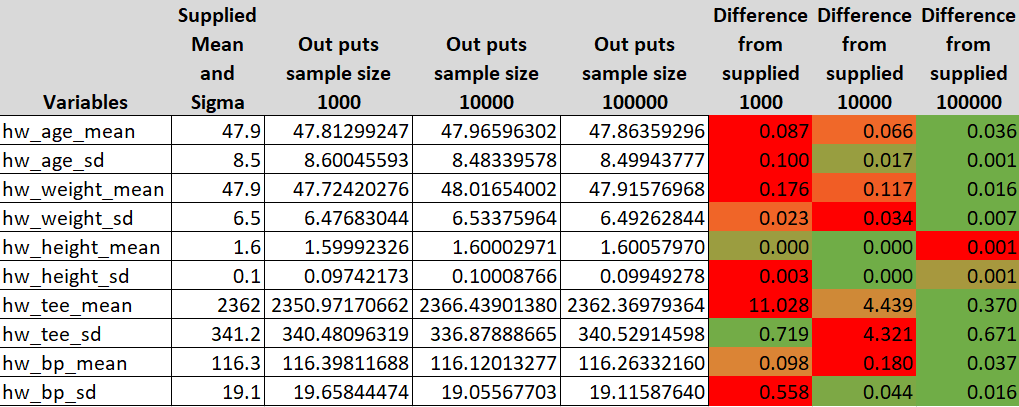

 **<i>Figure 2 - Testing Sample Sizes<i>**

In [107]:
# Test healthy weight standard deviation for randomly generated sample compared to provided standard deviation
hw_age.std()

8.524055198507359

In [108]:
# Create a dataset by combining the variables
hw_dataset = np.column_stack((hw_age, hw_height, hw_weight, hw_tee, hw_bp))

In [109]:
# Confirmatory calculation. Show the healthy weight age std dev.
hw_age.std()

8.524055198507359

In [110]:
#Convert Healthy Weight data to a DataFrame
hw_dataframe = pd.DataFrame(hw_dataset, columns = ['hw_age', 'hw_height', 'hw_weight', 'hw_tee', 'hw_bp'])
hw_dataframe

,hw_age,hw_height,hw_weight,hw_tee,hw_bp
0,44.813609,1.583454,56.611457,2808.007526,133.195455
1,55.593117,1.553677,46.180616,2285.460975,121.237317
2,41.623410,1.681256,44.955044,2990.008203,108.893510
3,45.876519,1.801117,42.083866,2187.160489,104.298749
4,49.514627,1.697599,33.457965,2661.489137,95.090289
...,...,...,...,...,...
995,54.000678,1.704973,41.520940,1775.568044,110.889509
996,36.493719,1.543210,48.791781,2464.901032,105.358926
997,34.408336,1.423603,39.338271,1746.690604,134.485272
998,46.635009,1.485048,43.865946,2552.242915,126.759335


In [111]:
# Generate the Healthy Weight categorical DataFrame.
hw_cat_df = pd.DataFrame (['healthy weight'] * 1000,  columns=['Weight Category'])
# Add Weight Category to Healthy weight dataframe
hw_dataframe1 = pd.concat([hw_dataframe, hw_cat_df], axis = 1)


In [112]:
# Show the healthy weight dataframe with the categorical column added. 
hw_dataframe1

,hw_age,hw_height,hw_weight,hw_tee,hw_bp,Weight Category
0,44.813609,1.583454,56.611457,2808.007526,133.195455,healthy weight
1,55.593117,1.553677,46.180616,2285.460975,121.237317,healthy weight
2,41.623410,1.681256,44.955044,2990.008203,108.893510,healthy weight
3,45.876519,1.801117,42.083866,2187.160489,104.298749,healthy weight
4,49.514627,1.697599,33.457965,2661.489137,95.090289,healthy weight
...,...,...,...,...,...,...
995,54.000678,1.704973,41.520940,1775.568044,110.889509,healthy weight
996,36.493719,1.543210,48.791781,2464.901032,105.358926,healthy weight
997,34.408336,1.423603,39.338271,1746.690604,134.485272,healthy weight
998,46.635009,1.485048,43.865946,2552.242915,126.759335,healthy weight


## Under Weight Data Generation
***

In [113]:
# Define the means and standard deviations for the "healthy weight" variables
uw_age_mean = 47.6
uw_age_sd = 8.1
  
uw_weight_mean = 48.2
uw_weight_sd = 8.6

uw_height_mean = 1.6
uw_height_sd = 0.1

uw_tee_mean = 2380.6
uw_tee_sd = 384.6

uw_bp_mean = 111.3
uw_bp_sd = 20.0

In [114]:
# Generate random data for each variable with the specified standard deviations
uw_age = np.random.normal(uw_age_mean, uw_age_sd, 1000)
uw_weight = np.random.normal(uw_weight_mean, uw_weight_sd, 1000)
uw_height = np.random.normal(uw_height_mean, uw_height_sd, 1000)
uw_tee = np.random.normal(uw_tee_mean, uw_tee_sd, 1000)
uw_bp = np.random.normal(uw_bp_mean, uw_bp_sd, 1000)

# Create a dataset by combining the variables
uw_dataset = np.column_stack((uw_age, uw_height, uw_weight, uw_tee, uw_bp))


In [115]:
uw_dataframe = pd.DataFrame(uw_dataset, columns = ['uw_age', 'uw_height', 'uw_weight', 'uw_tee', 'uw_bp'])
uw_dataframe

,uw_age,uw_height,uw_weight,uw_tee,uw_bp
0,30.032645,1.465196,41.195576,2980.336042,106.701902
1,34.276346,1.528281,46.462240,1888.500264,109.103750
2,47.808015,1.619155,57.818017,2553.386039,108.147247
3,45.841910,1.668191,60.800121,2177.258451,112.104438
4,43.445437,1.483855,42.060450,2357.874932,135.153175
...,...,...,...,...,...
995,60.894629,1.649599,51.259434,2287.604404,138.268751
996,39.841897,1.720118,47.202699,2417.988222,96.155929
997,36.833865,1.754267,49.498252,2227.397879,104.021283
998,60.236333,1.662895,44.938223,1823.976500,125.909611


In [116]:
uw_cat_df = pd.DataFrame (['underweight'] * 1000,  columns=['Weight Category'])
uw_dataframe1 = pd.concat([ uw_dataframe, uw_cat_df], axis = 1)
uw_dataframe1

,uw_age,uw_height,uw_weight,uw_tee,uw_bp,Weight Category
0,30.032645,1.465196,41.195576,2980.336042,106.701902,underweight
1,34.276346,1.528281,46.462240,1888.500264,109.103750,underweight
2,47.808015,1.619155,57.818017,2553.386039,108.147247,underweight
3,45.841910,1.668191,60.800121,2177.258451,112.104438,underweight
4,43.445437,1.483855,42.060450,2357.874932,135.153175,underweight
...,...,...,...,...,...,...
995,60.894629,1.649599,51.259434,2287.604404,138.268751,underweight
996,39.841897,1.720118,47.202699,2417.988222,96.155929,underweight
997,36.833865,1.754267,49.498252,2227.397879,104.021283,underweight
998,60.236333,1.662895,44.938223,1823.976500,125.909611,underweight


## Obese Weight Data Generation
***

In [117]:
# Define the means and standard deviations for the "obese" variables
obese_age_mean = 48.4
obese_age_sd = 7.9

obese_weight_mean = 81.6
obese_weight_sd = 14.8

obese_height_mean = 1.5
obese_height_sd = 0.1

obese_tee_mean = 2344.0
obese_tee_sd = 269.9

obese_bp_mean = 122.6
obese_bp_sd = 26.2

# Generate random data for each variable with the specified standard deviations
# Assumption data being reverse engineered is normally distributed
obese_age = np.random.normal(obese_age_mean, obese_age_sd, 1000)
obese_weight = np.random.normal(obese_weight_mean, obese_weight_sd, 1000)
obese_height = np.random.normal(obese_height_mean, obese_height_sd, 1000)
obese_tee = np.random.normal(obese_tee_mean, obese_tee_sd, 1000)
obese_bp = np.random.normal(obese_bp_mean, obese_bp_sd, 1000)

# Create a dataset by combining the variables
obese_dataset = np.column_stack((obese_age, obese_height, obese_weight, obese_tee, obese_bp))
#obese_dataset [:5]
obese_tee.mean()

2338.6095253617605

In [118]:
ob_dataframe = pd.DataFrame(obese_dataset, columns = ['obese_age', 'obese_height', 'obese_weight', 'obese_tee', 'obese_bp'])
ob_dataframe

,obese_age,obese_height,obese_weight,obese_tee,obese_bp
0,51.017800,1.453173,94.885502,2267.083129,144.695791
1,52.474154,1.699997,64.401512,2092.785280,138.443116
2,51.398582,1.445934,92.344585,2473.010113,114.022037
3,40.083297,1.414423,85.445818,1922.305406,138.143629
4,54.788116,1.431456,84.115021,2216.068885,147.680745
...,...,...,...,...,...
995,46.549569,1.526004,85.472199,2427.850386,144.618884
996,46.539557,1.672331,61.833265,2403.898015,170.912495
997,56.024117,1.541289,83.987911,1864.257308,96.537223
998,35.995241,1.474400,70.260775,2120.416194,102.209121


In [119]:
obese_cat_df = pd.DataFrame (['obese weight'] * 1000,  columns=['Weight Category'])
obese_dataframe1 = pd.concat([ob_dataframe, obese_cat_df], axis = 1)
obese_dataframe1

,obese_age,obese_height,obese_weight,obese_tee,obese_bp,Weight Category
0,51.017800,1.453173,94.885502,2267.083129,144.695791,obese weight
1,52.474154,1.699997,64.401512,2092.785280,138.443116,obese weight
2,51.398582,1.445934,92.344585,2473.010113,114.022037,obese weight
3,40.083297,1.414423,85.445818,1922.305406,138.143629,obese weight
4,54.788116,1.431456,84.115021,2216.068885,147.680745,obese weight
...,...,...,...,...,...,...
995,46.549569,1.526004,85.472199,2427.850386,144.618884,obese weight
996,46.539557,1.672331,61.833265,2403.898015,170.912495,obese weight
997,56.024117,1.541289,83.987911,1864.257308,96.537223,obese weight
998,35.995241,1.474400,70.260775,2120.416194,102.209121,obese weight


## Concatonate Data
*** 

In [120]:
# Create age dataframe
hw_age = hw_dataframe['hw_age']
uw_age = uw_dataframe['uw_age']
obese_age = ob_dataframe['obese_age']
age = pd.concat([hw_age, uw_age, obese_age], ignore_index=True)
age_df = pd.DataFrame(age)
type (age_df)

pandas.core.frame.DataFrame

In [121]:
# Create weight dataframe
hw_weight = hw_dataframe['hw_weight']
uw_weight = uw_dataframe['uw_weight']
obese_weight = ob_dataframe['obese_weight']
weight = pd.concat([hw_weight, uw_weight, obese_weight], ignore_index=True)
weight_df = pd.DataFrame(weight)

In [122]:
# Create height dataframe
hw_height = hw_dataframe['hw_height']
uw_height = uw_dataframe['uw_height']
obese_height = ob_dataframe['obese_height']
height = pd.concat([hw_height, uw_height, obese_height], ignore_index=True)
height_df = pd.DataFrame(height)

In [123]:
# Create total energy expenditure dataframe
hw_tee = hw_dataframe['hw_tee']
uw_tee = uw_dataframe['uw_tee']
obese_tee = ob_dataframe['obese_tee']
tee = pd.concat([hw_tee, uw_tee, obese_tee], ignore_index=True)
tee_df = pd.DataFrame(tee)

In [124]:
# Create blood pressure dataframe
hw_bp = hw_dataframe['hw_bp']
uw_bp = uw_dataframe['uw_bp']
obese_bp = ob_dataframe['obese_bp']
bp = pd.concat([hw_bp, uw_bp, obese_bp], ignore_index=True)
bp_df = pd.DataFrame(bp)

In [125]:
# Create a dataframe with all continuous variables from the 3 weight categories 
combined_continuous = pd.concat([age_df , weight_df,height_df, tee_df, bp_df], axis=1)
combined_continuous.columns = ['Age' , 'Weight', 'Height', 'Total Energy Ex', 'Blood Pressure' ]
combined_continuous

,Age,Weight,Height,Total Energy Ex,Blood Pressure
0,44.813609,56.611457,1.583454,2808.007526,133.195455
1,55.593117,46.180616,1.553677,2285.460975,121.237317
2,41.623410,44.955044,1.681256,2990.008203,108.893510
3,45.876519,42.083866,1.801117,2187.160489,104.298749
4,49.514627,33.457965,1.697599,2661.489137,95.090289
...,...,...,...,...,...
2995,46.549569,85.472199,1.526004,2427.850386,144.618884
2996,46.539557,61.833265,1.672331,2403.898015,170.912495
2997,56.024117,83.987911,1.541289,1864.257308,96.537223
2998,35.995241,70.260775,1.474400,2120.416194,102.209121


### Generating the Categorical Variable 'Weight Category'

In [126]:
hw = hw_dataframe1['Weight Category']
uw = uw_dataframe1['Weight Category']
obese = obese_dataframe1['Weight Category']
weightcat = pd.concat([hw, uw, obese], ignore_index=True)
weightcat_df = pd.DataFrame(weightcat)
weightcat_df

,Weight Category
0,healthy weight
1,healthy weight
2,healthy weight
3,healthy weight
4,healthy weight
...,...
2995,obese weight
2996,obese weight
2997,obese weight
2998,obese weight


In [127]:
# Combine the dataframes together
combined_all = pd.concat([combined_continuous, weightcat_df], axis=1)
combined_all

,Age,Weight,Height,Total Energy Ex,Blood Pressure,Weight Category
0,44.813609,56.611457,1.583454,2808.007526,133.195455,healthy weight
1,55.593117,46.180616,1.553677,2285.460975,121.237317,healthy weight
2,41.623410,44.955044,1.681256,2990.008203,108.893510,healthy weight
3,45.876519,42.083866,1.801117,2187.160489,104.298749,healthy weight
4,49.514627,33.457965,1.697599,2661.489137,95.090289,healthy weight
...,...,...,...,...,...,...
2995,46.549569,85.472199,1.526004,2427.850386,144.618884,obese weight
2996,46.539557,61.833265,1.672331,2403.898015,170.912495,obese weight
2997,56.024117,83.987911,1.541289,1864.257308,96.537223,obese weight
2998,35.995241,70.260775,1.474400,2120.416194,102.209121,obese weight


## Histogram of Continuous Variables
***

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Total Energy Ex'}>],
       [<Axes: title={'center': 'Blood Pressure'}>, <Axes: >]],
      dtype=object)

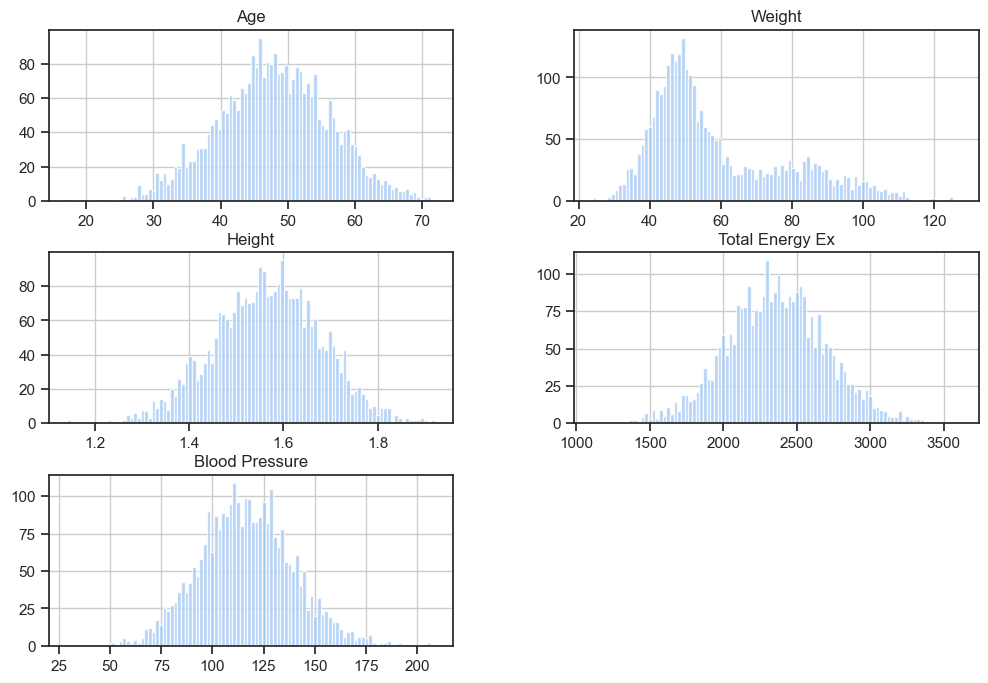

In [128]:
combined_all.hist(alpha=0.8, bins=100, figsize=(12,8))

The histogram depicts the distribution of the data for the five categorical variables, all of which are normally distributed with the exception of weight. The mean of the underweight category is higher than the mean of the healthy weight category which would lead one to think there was an anomaly with the categorisation of the participants in relation to weight thus providing a rationale for the left skewed peak in the data.

## Scatterplots
***

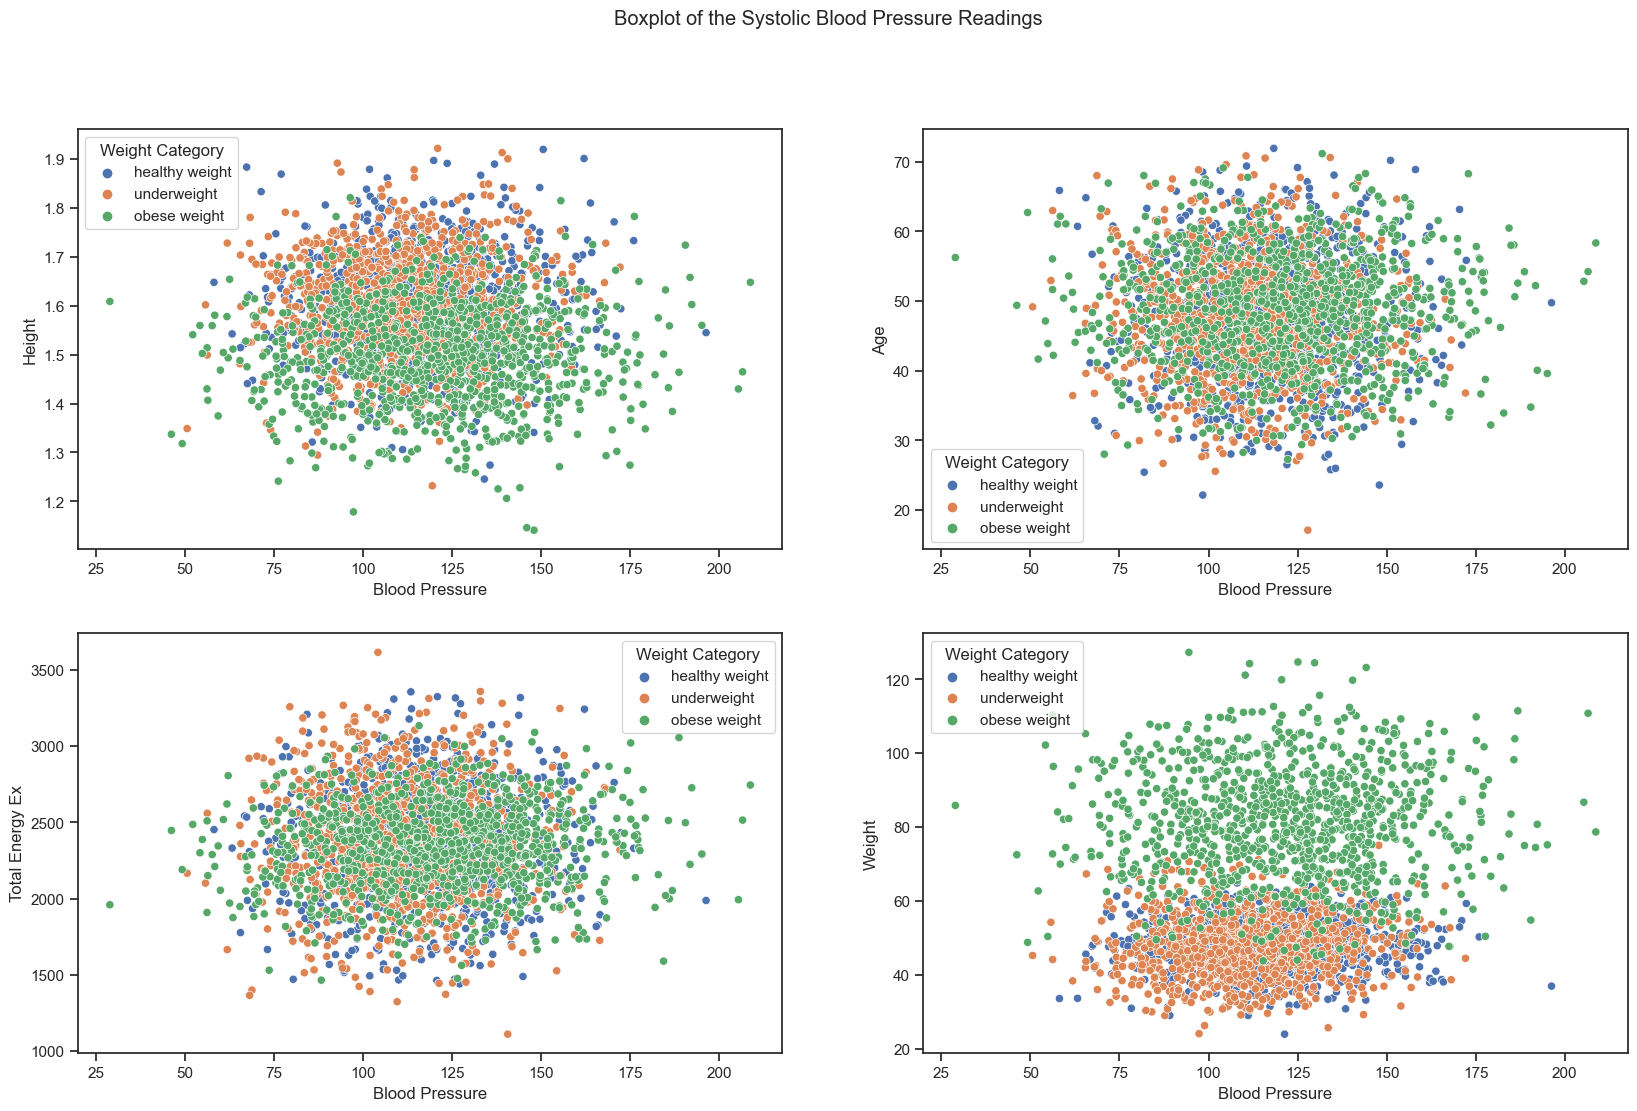

In [143]:
sns.set(style="ticks", palette="deep")
f, axes = plt.subplots(2, 2, sharey=False, figsize=(20, 12))
sns.scatterplot(x = "Blood Pressure", y = "Age", hue = 'Weight Category',  data = combined_all, ax=axes[0,1])
sns.scatterplot(x = "Blood Pressure" , y = "Weight"  , hue = 'Weight Category' , data = combined_all, ax=axes[1,1])
sns.scatterplot(x= "Blood Pressure"  , y= "Height", hue = 'Weight Category', data = combined_all, ax=axes[0,0])
sns.scatterplot(x= "Blood Pressure" , y= "Total Energy Ex", hue = 'Weight Category', data = combined_all, ax=axes[1,0])
f.suptitle("Boxplot of the Systolic Blood Pressure Readings")
plt.show()

The scatterplots, having a large number of data points, don't provide much clarity from initial inspection. What can be deduced is blood pressure appears evenly spread across all weight categories and obese participants are shorter and healthy weight participants are taller. The healthy weight and underweight data points are nearly are tightly grouped together while the obese is more appropriately scattered.

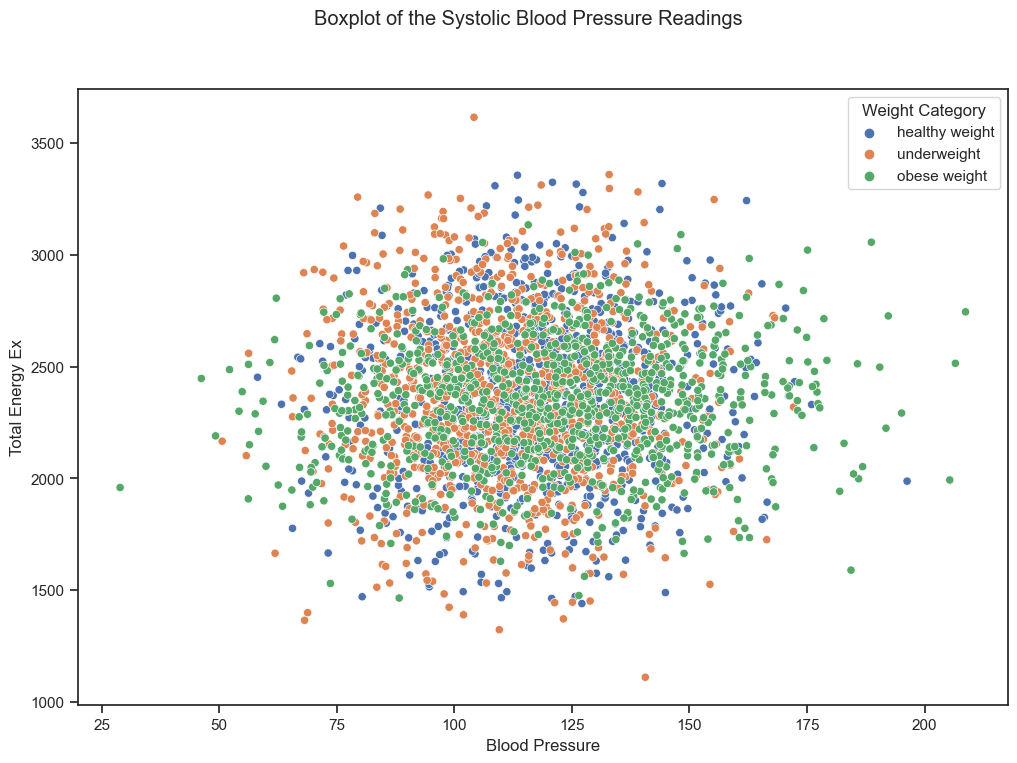

In [144]:
sns.set(style="ticks", palette="deep")
f, axes = plt.subplots( sharey=False, figsize=(12, 8))
sns.scatterplot(x = "Blood Pressure", y = "Total Energy Ex", hue = 'Weight Category',  data = combined_all)
f.suptitle("Boxplot of the Systolic Blood Pressure Readings")
plt.show()

Observing the TEE verses the blood pressure more closely there appears to be no correlation, at least visually, between the two for ny of the weight categories. 

## Boxplots
***

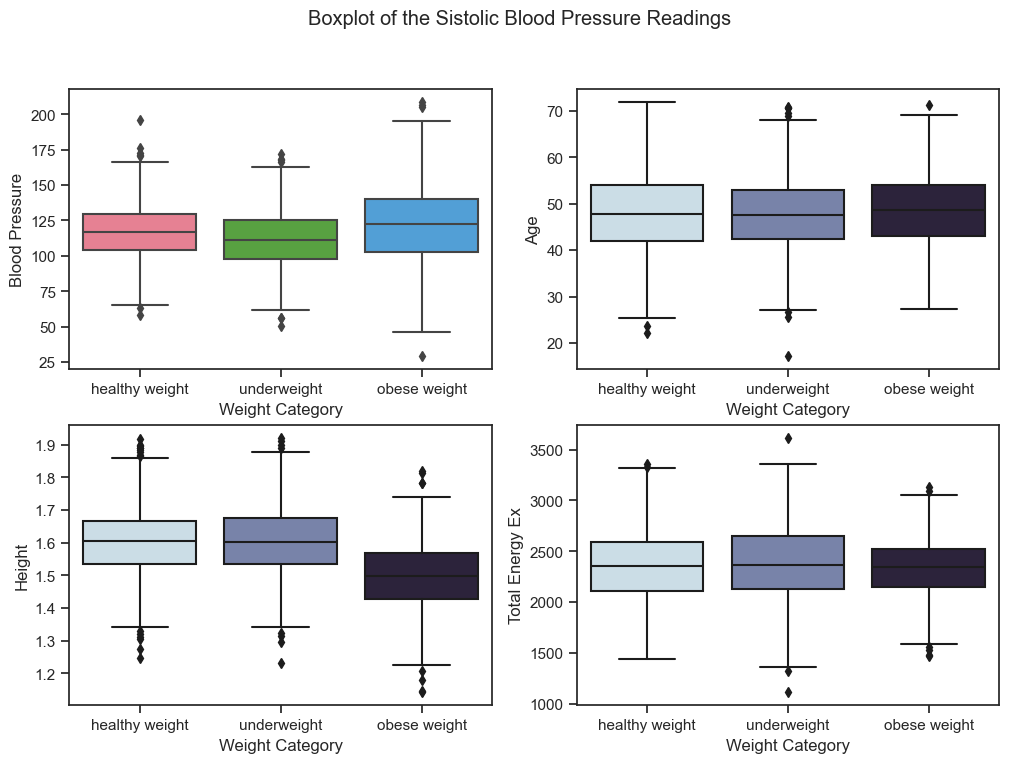

In [131]:
sns.set(style="ticks", palette="pastel")
f, axes = plt.subplots(2, 2, sharey=False, figsize=(12, 8))

sns.boxplot(x= 'Weight Category', y= "Age", data = combined_all, palette = "ch:s=.25,rot=-.25",  ax=axes[0,1])
sns.boxplot(x= 'Weight Category', y= "Total Energy Ex", data = combined_all,  palette = "ch:s=.25,rot=-.25",  ax=axes[1,1])
sns.boxplot(x= 'Weight Category', y= "Height", data = combined_all,  palette = "ch:s=.25,rot=-.25", ax=axes[1,0])
sns.boxplot(x= 'Weight Category', y= "Blood Pressure", data = combined_all, palette = "husl" ,ax=axes[0,0])
f.suptitle("Boxplot of the Sistolic Blood Pressure Readings")
plt.show()

### Alternative method for generating categorical data

The original study report included a breakdown of the employment status of the participants, which is depicted table 4. From this ratios were established and used to generate a further categorical variable to add to the previously generated data set.

| <span style='color:green'>**Employment Status**</span>|	Healthy weight| 	Underweight |	 Obese| Ratio (for generation of data)|
|-----|-----|-----|---|---|
|<span style='color:green'>Student</span>             |	2	    |1|	                4|0.002|
|<span style='color:green'>Employed</span>            |	1194    |70|              	721| 0.356|
|<span style='color:green'>Unemployed</span>          |	1064	|51 |                	1991|0.557|
|<span style='color:green'>Retired</span>             |	251	    |13  |            	212	| 0.085|

**<i>Table 4 - Counts of Categorical Data<i>**

<div class="alert alert-block alert-info">
<b>Note:</b> Note, the data generated below does not align to the employment status of the study participants. It is included in this report to demonstrate the method for data generation and to show additional visualisations possible where there are two categorical variables. 
</div>

In [145]:
categories = ['Student', 'Employed', 'Unemployed','Retired']
weights = [0.002, 0.356, 0.557, 0.085]  # Adjust weights based on desired probabilities

# Generate a list of random categories with specified weights
num_samples = 3000
random_employment_list = random.choices(categories, weights=weights, k=num_samples)
employment_list = pd.Series(random_employment_list, dtype="category")
employment_list.cat.categories
employment_list

0         Employed
1         Employed
2       Unemployed
3         Employed
4         Employed
           ...    
2995    Unemployed
2996    Unemployed
2997    Unemployed
2998      Employed
2999    Unemployed
Length: 3000, dtype: category
Categories (4, object): ['Employed', 'Retired', 'Student', 'Unemployed']

In [146]:
# Convert from a pd series to df
employment_df = pd.DataFrame(random_employment_list)
employment_df.index.is_unique
employment_df.columns = ['Employment Status']

employment_df

,Employment Status
0,Employed
1,Employed
2,Unemployed
3,Employed
4,Employed
...,...
2995,Unemployed
2996,Unemployed
2997,Unemployed
2998,Employed


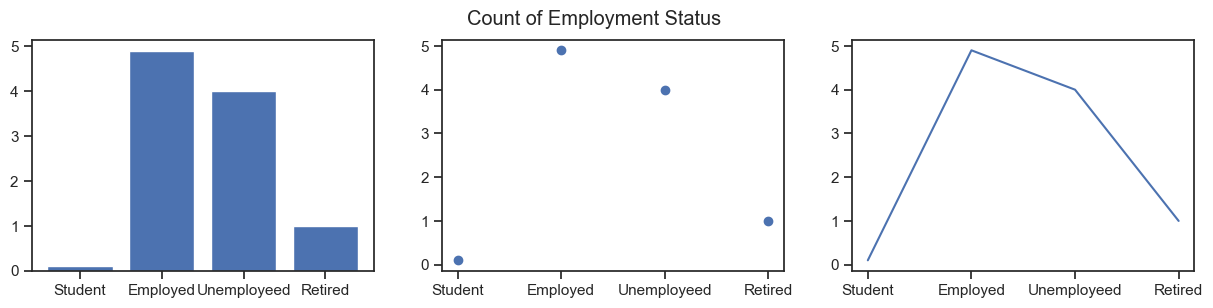

In [147]:
names = ['Student', 'Employed', 'Unemployeed','Retired']
values = [0.1, 4.9, 4.0, 1.0]

plt.figure(figsize=(15, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Count of Employment Status')
plt.show()

In [135]:
# Checking for duplicate indices 
print(combined_continuous.index.duplicated().any())
print(employment_df.index.duplicated().any())

False
False


In [136]:
combined_continuous.reset_index(drop=True, inplace=True)
employment_df.reset_index(drop=True, inplace=True)


In [148]:
# Combine dataframes
combined_all1 = pd.concat([combined_continuous, weightcat_df, employment_df], axis=1)
combined_all1

,Age,Weight,Height,Total Energy Ex,Blood Pressure,Weight Category,Employment Status
0,44.813609,56.611457,1.583454,2808.007526,133.195455,healthy weight,Employed
1,55.593117,46.180616,1.553677,2285.460975,121.237317,healthy weight,Employed
2,41.623410,44.955044,1.681256,2990.008203,108.893510,healthy weight,Unemployed
3,45.876519,42.083866,1.801117,2187.160489,104.298749,healthy weight,Employed
4,49.514627,33.457965,1.697599,2661.489137,95.090289,healthy weight,Employed
...,...,...,...,...,...,...,...
2995,46.549569,85.472199,1.526004,2427.850386,144.618884,obese weight,Unemployed
2996,46.539557,61.833265,1.672331,2403.898015,170.912495,obese weight,Unemployed
2997,56.024117,83.987911,1.541289,1864.257308,96.537223,obese weight,Unemployed
2998,35.995241,70.260775,1.474400,2120.416194,102.209121,obese weight,Employed


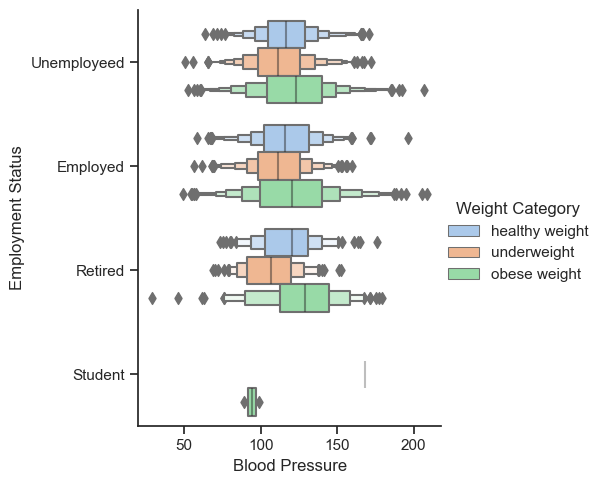

In [139]:
# Show boxen type visualisation
sns.catplot(data=combined_all1, x= "Blood Pressure", y = "Employment Status", hue = "Weight Category", kind="boxen")

## t-Test comparing Weight and Systolic Blood Pressure
***

In [140]:
ss.ttest_ind(hw_bp, obese_bp)

Ttest_indResult(statistic=-4.208608874930886, pvalue=2.68332017422557e-05)

The null hypothesis is there is no statistical difference between the blood pressure of a healthy person compared to that of an obese person. When evaluated using t-test a p value of $2.68$ was returned establishing there is no significant difference in blood pressure using the data generated in this study.

Note, as the data is generated randomly each time the program is ran a different p value may be reported than that stated above. It should however still result in the same hypothesis determination.

## One-way ANOVA comparing Blood Pressure Variables 
***

In [141]:
f_oneway(uw_bp, hw_bp, obese_bp)

F_onewayResult(statistic=48.38668196730771, pvalue=2.0800461755891037e-21)

The ANOVA returns a p value of $2.08$ establishing there is no significant difference between blood pressure of all three weight categories. 

### Alternative method for generating data

In [142]:
n = s.NormalDist(mu=47.9, sigma=8.5)
samples = n.samples(1000, seed=42)  
print(s.mean(samples))  
print(s.stdev(samples)) 

47.74471087791342
8.666641787191438


## References
***

[1] Rashidi AA, Heidari Bakavoli AR, Avan A, Aghasizade M, Ghazizadeh H, Tayefi M, Khayyatzadeh SS, Ebrahimi M, Moohebati M, Safarian M, Nematy M, Sadr-Bazzaz M, Ferns GA, Ghayour Mobarhan M. Dietary Intake and Its Relationship to Different Body Mass Index Categories: A Population-Based Study. J Res Health Sci. 2018 Sep 8;18(4):e00426. PMID: 30728312; PMCID: PMC6941633, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6941633/ accessed on 06 NOV 2023

[2] Data to Fish. (n.d.). NumPy array to Pandas DataFrame. Retrieved November 8, 2023, from https://datatofish.com/numpy-array-to-pandas-dataframe/

[3] GeeksforGeeks. (2023, November 8). How to perform a one-way ANOVA in Python. Retrieved from https://www.geeksforgeeks.org/how-to-perform-a-one-way-anova-in-python/

[4] pandas. (n.d.). Merging, Joining, and Concatenating. Retrieved November 8, 2023, from https://pandas.pydata.org/docs/user_guide/merging.html

[5] Science Direct, (n.d.). Retrieved November 8, 2023, from https://www.sciencedirect.com/science/article/pii/S1047279796001275 

[6] GeeksforGeeks. (2023, November 12). Retrieved from https://www.geeksforgeeks.org/how-to-combine-two-dataframe-in-python-pandas/ 

[7] GeeksforGeeks. (2023, November 12).Retrieved from https://www.geeksforgeeks.org/add-column-names-to-dataframe-in-pandas/

[8] matplotlib, (n.d.). Retrieved November 12, 2023, from https://matplotlib.org/stable/tutorials/pyplot.html 

[9] seaborn, (n.d.). Retrieved November 13, 2023, from https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette 

[10] w3schools. (n.d.) Retrieved December 3, 2023, from https://www.w3schools.com/python/ref_random_choices.asp

[11] seaborn. (n.d.) Retrieved December 3, 2023, from https://seaborn.pydata.org/generated/seaborn.catplot.html